In [1]:
!pip install boto3 numpy nibabel matplotlib

  Using cached boto3-1.35.45-py3-none-any.whl.metadata (6.7 kB)
  Using cached numpy-2.1.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached nibabel-5.3.1-py3-none-any.whl.metadata (9.1 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached botocore-1.35.45-py3-none-any.whl.metadata (5.7 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.10.3-py3-none-any.whl.metadata (1.7 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached boto3-1.35.45-py3-none-any.whl (139 

Fetching file: BraTS20_Training_369_flair.nii
Data shape for BraTS20_Training_369_flair.nii: (240, 240, 155)


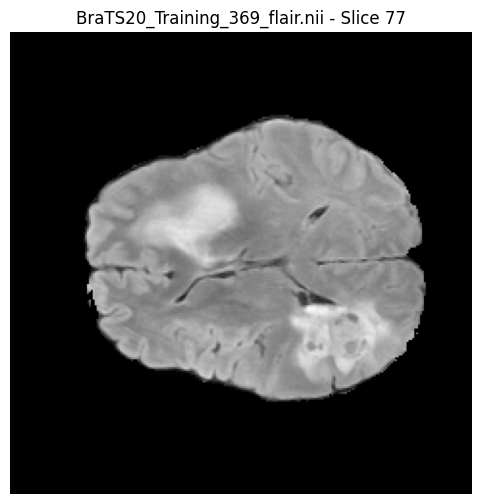

Fetching file: BraTS20_Training_369_seg.nii


In [ ]:
import boto3
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import io
import tempfile

s3 = boto3.resource('s3')
bucket_name = 'chemocraft-data'
folder_path = 'Data/BraTS20_Training_369 copy/'
bucket = s3.Bucket(bucket_name)

def render_nii_from_s3(filename):
    print(f"Fetching file: {filename}")

    obj = bucket.Object(folder_path + filename)
    file_stream = io.BytesIO(obj.get()['Body'].read())
    
    with tempfile.NamedTemporaryFile(suffix='.nii', delete=True) as temp_file:
        temp_file.write(file_stream.getvalue())
        temp_file.flush()  

        try:
            img = nib.load(temp_file.name)
            data = img.get_fdata()
            
            print(f"Data shape for {filename}: {data.shape}")
            
            if data.size == 0:
                print(f"No data found in {filename}")
                return
            
            slice_idx = data.shape[2] // 2
            
            plt.figure(figsize=(6, 6))
            plt.imshow(data[:, :, slice_idx], cmap='gray')
            plt.title(f'{filename} - Slice {slice_idx}')
            plt.axis('off')  # Hide axes for cleaner display
            plt.show()
        except Exception as e:
            print(f"Error loading file {filename}: {e}")

found_files = False
for obj in bucket.objects.filter(Prefix=folder_path):
    if obj.key.endswith('.nii'):
        found_files = True
        filename = obj.key.split('/')[-1]  # Get the filename
        render_nii_from_s3(filename)

if not found_files:
    print(f"No .nii files found in the folder {folder_path}")